# Regressão Linear

Aula prática de regressão linear. 
O objetivo é prever o custo da diária de um imóvel baseado ao número de pessoas



In [ ]:
# importando as bibliotecas 
import pandas as pd # Trabalhar com tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos 
import seaborn as sns # biblioteca para gráficos 
import numpy as np #funções matemáticas de alto nível 




Abrindo o arquivo conténdo os dados utilizados na regressão



In [ ]:
base_custo_diaria = pd.read_csv('base_custo_diaria.csv', sep= ';')

In [ ]:
#visalizando arquivos da base de dados
base_custo_diaria.head

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             4           385
2             6           499
3            10           680
4            13           735
5            15           859
6            18           989
7            22          1075
8            25          1500
9            30          1850
10           40          2000
11           42          2089
12           45          2250
13           47          2488
14           50          2680>

In [ ]:
# algumas estatisticas da base de dados 
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


Criando as variáveis que serão utilizadas no modelo

In [ ]:
# Criando variável independente  
X_custo_diaria = base_custo_diaria.iloc[:,0].values #buscamos todos os registros da primeira coluna e convertemos no formato de array
# o comando iloc permite selecionar um conjunto de registros. o dois pontos ":" significa que estamos selecionando todos os regisros e zero "0" a primeira coluna
X_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [ ]:
#criando variável dependente (o que queremos predizer)
y_custo_diaria = base_custo_diaria.iloc[:,1].values
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [ ]:
np.corrcoef(X_custo_diaria,y_custo_diaria) # mostra uma matriz 

array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

# Correlação

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.



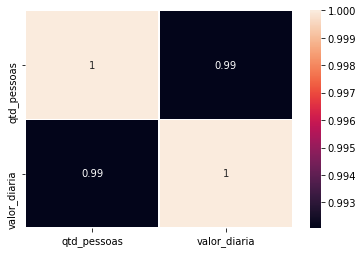

In [ ]:
correlation = base_custo_diaria.corr()
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True,  linewidths=.3)
plot

Perceba que temos uma correlçao forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta. 
Além disso, podemos dizer que em 99% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.


#Tratando os dados para o modelo
Nesse passo vamos realizar transformações nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicitada como entrada. 

In [ ]:
#vizualiar o formato da variável
X_custo_diaria.shape # 

(15,)

In [ ]:
#visualizando variável
X_custo_diaria # o resultado mostra que temos uma array com apenas uma coluna/dimensão. NO entanto, precisamos ter uma matriz com 2 colunas

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [ ]:
X_custo_diaria = X_custo_diaria.reshape(-1,1)
X_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [ ]:
# Agora nós temos uma matriz com duas colunas. 10 linhas e uma coluna
X_custo_diaria.shape 

(15, 1)

# Aplicando os dados ao algoritmo de machine de regressão

In [ ]:
from sklearn.linear_model import LinearRegression
# cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [ ]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

# Realizando o Treinamento do modelo

In [ ]:
previsao_custo_diaria.fit(X_custo_diaria, y_custo_diaria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Verfificando a interceptação  
previsao_custo_diaria.intercept_


155.91874556932066

In [ ]:
#Verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([48.61472504])

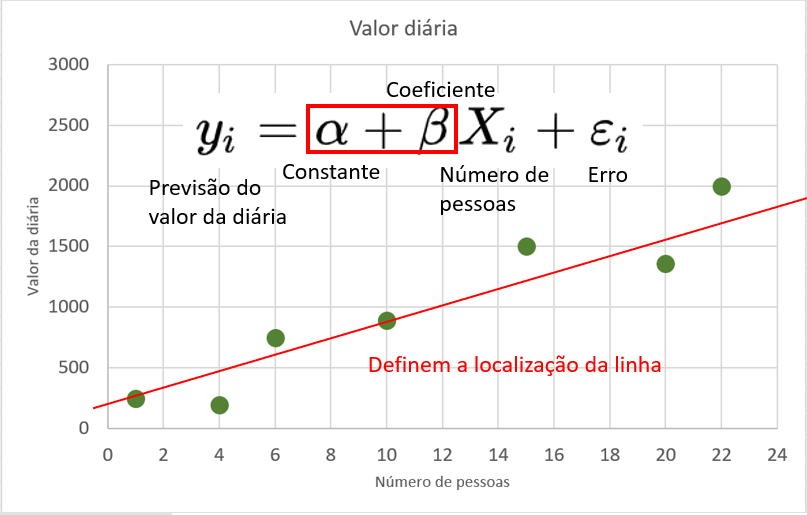

In [ ]:
previsao_precos = previsao_custo_diaria.predict(X_custo_diaria)# baseado nos valores de nº de pessoas, vamos estimar/prever o custo do imóvel alugado

In [ ]:
#visualiza das previsões para cada nª de pessoas
previsao_precos

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

# Visualizando no gráfico as disposições dos dados
Para visualizar os dados no grafico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [ ]:
# Verificando tipo da variável X_custo_diaria
X_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [ ]:
X_custo_diaria.ravel() # transforma em um vetor

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [ ]:
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [ ]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [ ]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = X_custo_diaria.ravel(), y = previsao_precos, name= 'previsões')
grafico.show()

In [ ]:
# Verificando os valores de um determinada previsão baseada na quantidade de pessoas 
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([350.37764575])

In [ ]:
qtd_pessoas = 32
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([1711.589947])

In [ ]:
# Verificando de modo direto
previsao_custo_diaria.predict([[42]]) 

array([2197.73719745])

In [ ]:
#indica a qualidade do algoritmo (Quanto mais próximo de 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(X_custo_diaria, y_custo_diaria)

0.9842009960646791

In [ ]:
# Visualizano os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos)

In [ ]:
MSE

9989.829839426571

In [ ]:
#Calculando MAE 
mean_absolute_error(y_custo_diaria, previsao_precos)


83.84480977618742

In [ ]:
# Calculando RMSE
np.sqrt(MSE)

99.9491362615334